# Data Wrangling 

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline

# cntl ? makes something a comment
# shift R enter runs all above
# esc 1, 2, 3, 4, 5 makes something a kind of header
# esc X cuts a cell

## (a) Data Collection
### Locating the data, Data Loading, Data Joining

## (b) Data Organization
### File structure (?), Git and Github

In [5]:
os.getcwd()

'/Users/Livi/Projects/blm/capcookie/notebooks'

In [6]:
os.listdir()

['BLM_eda.ipynb',
 '.gitkeep',
 'BLM_data_wrangling.ipynb',
 '.ipynb_checkpoints',
 'old_notebooks']

In [7]:
#path = ""
#os.chdir(path)

In [8]:
path = "/Users/Livi/"
path + "/Projects/blm/capcookie/data/"

'/Users/Livi//Projects/blm/capcookie/data/'

In [9]:
df = pd.read_csv("/Users/Livi/Projects/blm/capcookie/data/raw/fatal-police-shootings-data.csv")

## (c) Data Definition
#### In this step, I'll review colnames, data types, null values, count/percent per unique values or codes, the ranges of values or codes

In [10]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [12]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5489 non-null   int64  
 1   name                     5489 non-null   object 
 2   date                     5489 non-null   object 
 3   manner_of_death          5489 non-null   object 
 4   armed                    5277 non-null   object 
 5   age                      5248 non-null   float64
 6   gender                   5488 non-null   object 
 7   race                     4937 non-null   object 
 8   city                     5489 non-null   object 
 9   state                    5489 non-null   object 
 10  signs_of_mental_illness  5489 non-null   bool   
 11  threat_level             5489 non-null   object 
 12  flee                     5231 non-null   object 
 13  body_camera              5489 non-null   bool   
dtypes: bool(2), float64(1), 

In [15]:
df.date = pd.to_datetime(df.date)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5489 non-null   int64         
 1   name                     5489 non-null   object        
 2   date                     5489 non-null   datetime64[ns]
 3   manner_of_death          5489 non-null   object        
 4   armed                    5277 non-null   object        
 5   age                      5248 non-null   float64       
 6   gender                   5488 non-null   object        
 7   race                     4937 non-null   object        
 8   city                     5489 non-null   object        
 9   state                    5489 non-null   object        
 10  signs_of_mental_illness  5489 non-null   bool          
 11  threat_level             5489 non-null   object        
 12  flee                     5231 non-

## Count of unique values or codes

In [18]:
df.nunique()

id                         5489
name                       5279
date                       1884
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2497
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

### When working with categorical columns, it's really helpful to know what the unique codes are.

In [19]:
df.manner_of_death.value_counts()

shot                5215
shot and Tasered     274
Name: manner_of_death, dtype: int64

In [20]:
df.race.value_counts()

W    2502
B    1305
H     910
A      94
N      78
O      48
Name: race, dtype: int64

In [21]:
df.signs_of_mental_illness.value_counts()

False    4263
True     1226
Name: signs_of_mental_illness, dtype: int64

In [22]:
df.threat_level.value_counts()

attack          3548
other           1697
undetermined     244
Name: threat_level, dtype: int64

In [23]:
df.flee.value_counts()

Not fleeing    3453
Car             906
Foot            702
Other           170
Name: flee, dtype: int64

In [24]:
pd.set_option('display.max_rows',200)

In [25]:
df.armed.value_counts()

gun                                 3109
knife                                804
unarmed                              354
toy weapon                           192
undetermined                         167
vehicle                              156
unknown weapon                        79
machete                               45
Taser                                 26
ax                                    24
sword                                 22
baseball bat                          18
gun and knife                         17
hammer                                16
metal pipe                            13
screwdriver                           13
sharp object                          13
box cutter                            12
hatchet                               11
gun and car                           11
gun and vehicle                       10
crossbow                               9
scissors                               7
rock                                   6
shovel          

## Range of Values per column

In [26]:
df.agg([min,max]).T

,min,max
id,3,6010
name,Austin Wilburly Reid,Zyon Romeir Wyche
date,2015-01-02 00:00:00,2020-07-28 00:00:00
manner_of_death,shot,shot and Tasered
age,6,91
city,300 block of State Line Road,Zion
state,AK,WY
signs_of_mental_illness,False,True
threat_level,attack,undetermined
body_camera,False,True


In [27]:
df.describe()

,id,age
count,5489.000000,5248.000000
mean,3050.945163,37.116806
std,1719.887629,13.125622
min,3.000000,6.000000
25%,1566.000000,27.000000
50%,3051.000000,35.000000
75%,4552.000000,46.000000
max,6010.000000,91.000000


## (d) Data Cleaning
### NA or missing data, Duplicates

In [28]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=["percent"])

In [29]:
nas[nas.percent>0]

,percent
race,0.100565
flee,0.047003
age,0.043906
armed,0.038623
gender,0.000182


In [30]:
import missingno as msno

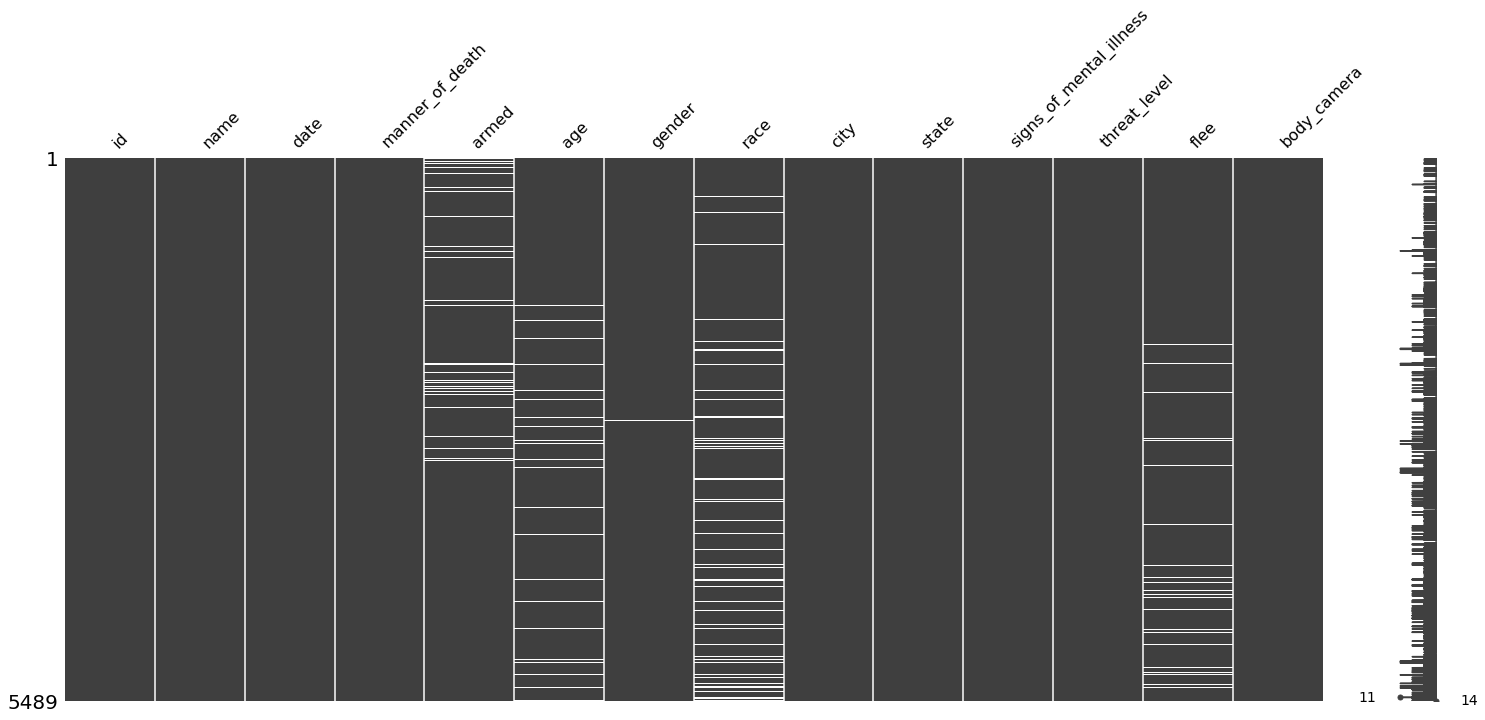

In [31]:
msno.matrix(df)

In [32]:
df.drop(index = df[df.race.isnull()].index, inplace=True)

In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.age.describe()

count    4851.000000
mean       36.538446
std        12.802171
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c62390>]],
      dtype=object)

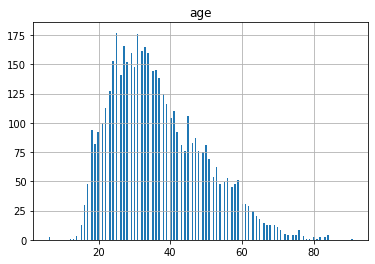

In [35]:
df.hist("age", bins=200)

In [36]:
meanage = df.age.mean()
df.age.fillna(meanage, inplace=True)

In [37]:
pd.options.display.min_rows=200
df[df.armed.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
15,29,Loren Simpson,2015-01-08,shot,NaN,28.000000,M,W,Huntley,MT,False,undetermined,Not fleeing,False
26,49,Marcus Golden,2015-01-14,shot,NaN,24.000000,M,B,St. Paul,MN,False,attack,Not fleeing,False
27,50,Michael Goebel,2015-01-14,shot,NaN,29.000000,M,W,Franklin County,MO,False,attack,Not fleeing,False
45,85,Dewayne Carr,2015-01-20,shot,NaN,42.000000,M,B,Scottsdale,AZ,False,other,Car,False
52,101,Demaris Turner,2015-01-23,shot,NaN,29.000000,M,B,Fort Lauderdale,FL,False,other,Not fleeing,False
64,348,Nicolas Leland Tewa,2015-01-27,shot,NaN,26.000000,M,N,Phoenix,AZ,False,other,Not fleeing,False
104,145,Jonathan Larry Harden,2015-02-13,shot,NaN,23.000000,M,W,San Bernardino,CA,False,attack,Car,False
121,162,Pedro Juan Saldivar,2015-02-17,shot,NaN,50.000000,M,H,Del Rio,TX,False,other,Not fleeing,False
137,178,Glenn Lewis,2015-02-25,shot,NaN,27.000000,M,B,Oklahoma City,OK,False,other,Car,False
165,270,Andrew Anthony Williams,2015-03-06,shot,NaN,48.000000,M,B,Putnam Hall,FL,False,other,Not fleeing,False


In [38]:
pd.options.display.min_rows=10

In [39]:
df.armed.fillna('undetermined', inplace=True)

In [40]:
df.flee.value_counts()

Not fleeing    3098
Car             823
Foot            650
Other           155
Name: flee, dtype: int64

In [41]:
df.flee.fillna('Other',inplace=True)

In [42]:
df[df.gender.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2545,2956,Scout Schultz,2017-09-16,shot,knife,21.0,NaN,W,Atlanta,GA,True,other,Not fleeing,False


In [43]:
df.gender.fillna('Nonbinary', inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4937 non-null   int64         
 1   name                     4937 non-null   object        
 2   date                     4937 non-null   datetime64[ns]
 3   manner_of_death          4937 non-null   object        
 4   armed                    4937 non-null   object        
 5   age                      4937 non-null   float64       
 6   gender                   4937 non-null   object        
 7   race                     4937 non-null   object        
 8   city                     4937 non-null   object        
 9   state                    4937 non-null   object        
 10  signs_of_mental_illness  4937 non-null   bool          
 11  threat_level             4937 non-null   object        
 12  flee                     4937 non-

In [45]:
df.duplicated().sum()

0

In [46]:
df.to_csv('/Users/Livi/Projects/blm/capcookie/data/processed/fatalwrangling.csv')